# Stock Price Predictor Project 

Dan Cersosimo | Data Scientist | LSTM Neural Networks, ARIMA, and ETS

# Contextualization

Stock Prices are subject to frequent fluctuations as a product of a myriad of extenuating factors which are integral in the materialized price. As a result, the ability to predict these values is quite difficult and therefore I will engage in a process of building models in an effort to enhance our ability to act on accurate predictions. This problem is quite intriguing due to the sheer magnitude of the stock trading industry and the impact any level of insight could have on millions of individuals profits. For this project I will acquire 5 year data from Yahoo Finance for Apple, PepsiCo, Amazon, Google, and Barnes & Nobles. This data will have an array of stock price metrics such as opening, high, low, closing and adjusted closing prices as well as volume. After preparing and exploring the data, I will to look to construct ETS, ARIMA, and LSTM models from this historical price data to predict the value of an of the price features depending on the user input. Metrics depicting how well the models capture the data, MSE, along with a forecast for 10 days will be calculated and visualized. As an additional component, I will build a tool based on the best model that will then ask the user for input of the past 10 days of the stock to predict the next day's stock. This tool will be useful in allowing the user to input hypothetical stock fluctuations over 10 days for a company so the model trained on 5 years of data can predict how these variations would culminate in the next day. Overall, the models produced from this project can have real world implications by allowing those involved in the stock market to gain insight into the nature of a handful of companies stock prices with regards to how they have and may fluctuate in the future. The tool described serves as an example of likely many user interactive instruments which could be derived from the models with strong real world usefulness. 

# Data Acquisition and Preprocessing: 

In [3]:
#This block loads the data and creates a list of the dfs

import pandas as pd

df_apple = pd.read_csv('AAPL.csv')
df_pepsi = pd.read_csv('PEP (1).csv')
df_amazon = pd.read_csv('AMZN (1).csv')
df_google = pd.read_csv('GOOG (1).csv')
df_barnes = pd.read_csv('BNED (1).csv')

Company_List = [df_apple, df_pepsi, df_amazon, df_google, df_barnes] 
Company_Names = ['Apple', 'Pepsico', 'Amazon', 'Google', 'Barnes & Nobles']

In the following Data Preprocessing, I will display various practices to ensure the cleaned and prepared state of the data for the intended modeling procedure.

In [4]:
#Check for nulls in each df
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    print(i.isnull().sum())
    print("")

Apple
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Pepsico
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Amazon
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Google
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Barnes & Nobles
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



In [5]:
#View sone summary statistics to heighten undertsanding of the features
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    print(i.describe())
    print("")

Apple
              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    125.039603   126.470096   123.721939   125.169607   123.729245   
std      45.992525    46.397984    45.591785    46.014232    46.335023   
min      39.062500    39.532501    38.527500    38.669998    37.115887   
25%      79.179377    79.913128    78.676872    79.440003    77.541872   
50%     136.224998   137.534996   134.345001   136.169999   134.552764   
75%     161.464996   164.169998   159.637500   161.915000   160.204433   
max     198.020004   199.619995   197.000000   198.110001   198.110001   

             Volume  
count  1.258000e+03  
mean   1.002312e+08  
std    5.197581e+07  
min    2.404830e+07  
25%    6.720060e+07  
50%    8.752580e+07  
75%    1.170909e+08  
max    4.265100e+08  

Pepsico
              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  

In [6]:
#Here I iterate through each company to disp;ay a correlation matrix for the features. Notice Volumes poor correlation
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    print(i[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr())
    print("")

Apple
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999641  0.999569  0.999096   0.999021 -0.465064
High       0.999641  1.000000  0.999477  0.999565   0.999456 -0.457401
Low        0.999569  0.999477  1.000000  0.999589   0.999561 -0.474682
Close      0.999096  0.999565  0.999589  1.000000   0.999927 -0.466544
Adj Close  0.999021  0.999456  0.999561  0.999927   1.000000 -0.469295
Volume    -0.465064 -0.457401 -0.474682 -0.466544  -0.469295  1.000000

Pepsico
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998591  0.998213  0.996852   0.992704 -0.059033
High       0.998591  1.000000  0.997563  0.998201   0.994242 -0.042330
Low        0.998213  0.997563  1.000000  0.998564   0.993488 -0.080895
Close      0.996852  0.998201  0.998564  1.000000   0.994910 -0.064171
Adj Close  0.992704  0.994242  0.993488  0.994910   1.000000 -0.036256
Volume    -0.059033 -0.042330 -0.080895 -0.064171  -0.036256  

C:\Users\dcers\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Apple


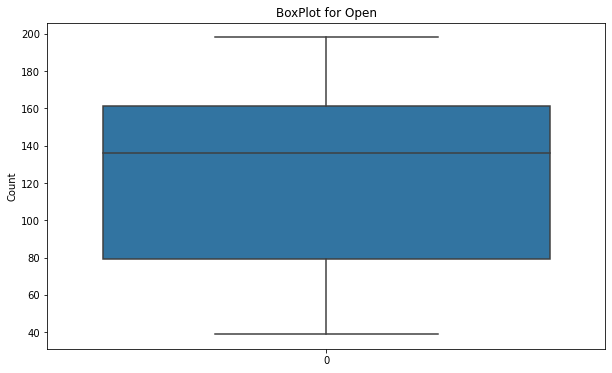

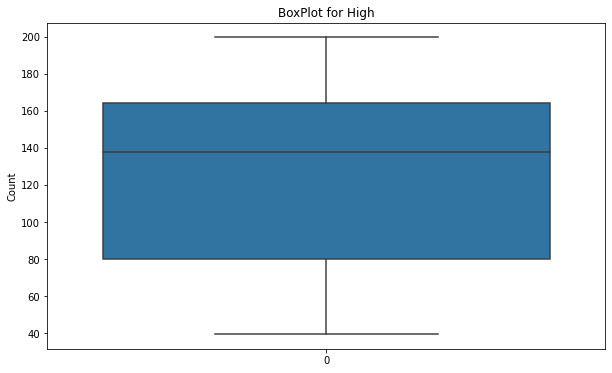

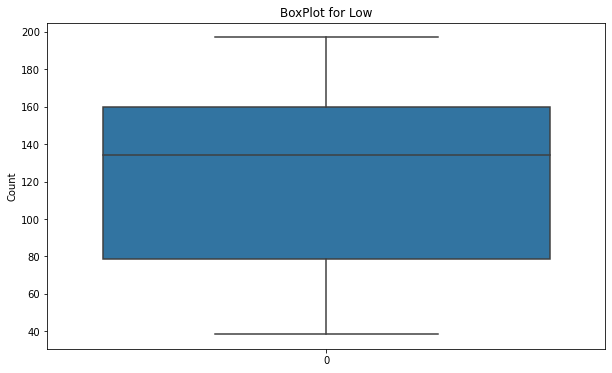

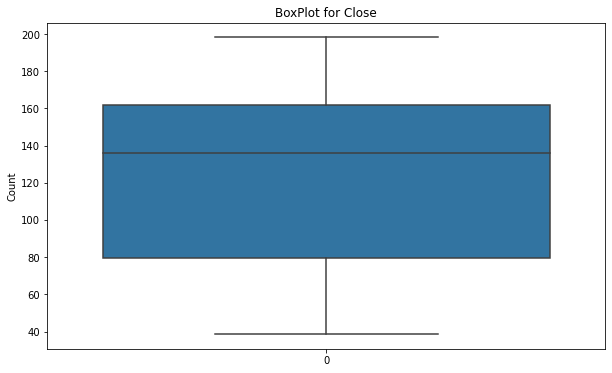

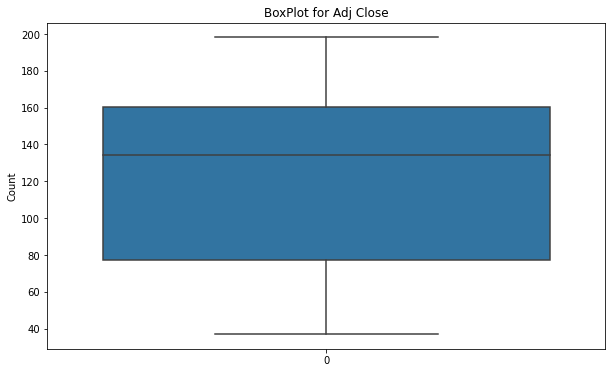

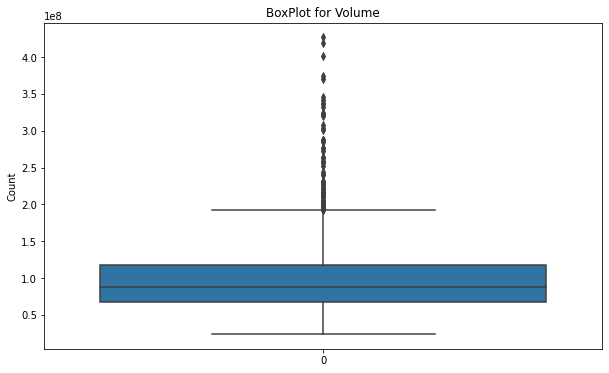


Pepsico


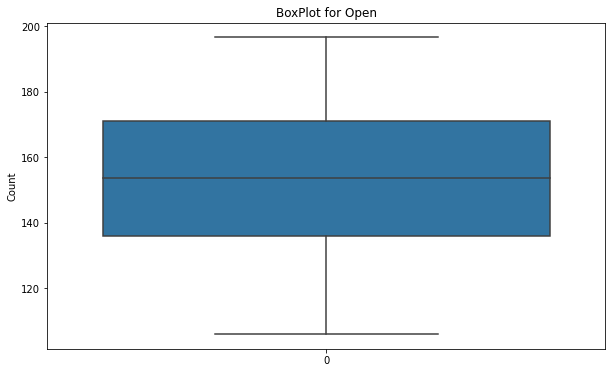

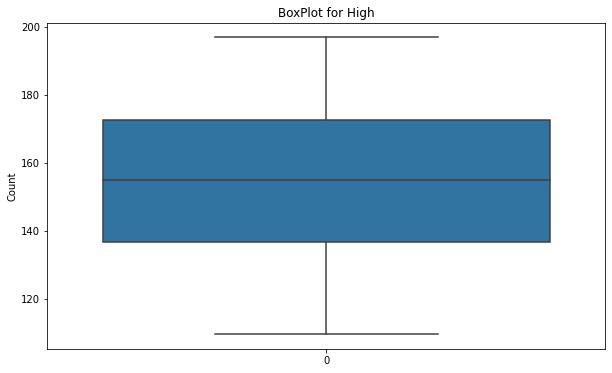

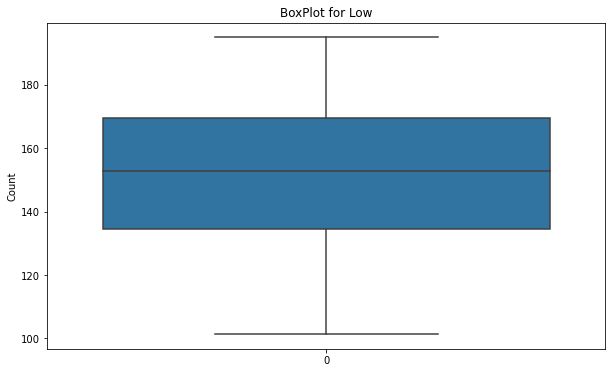

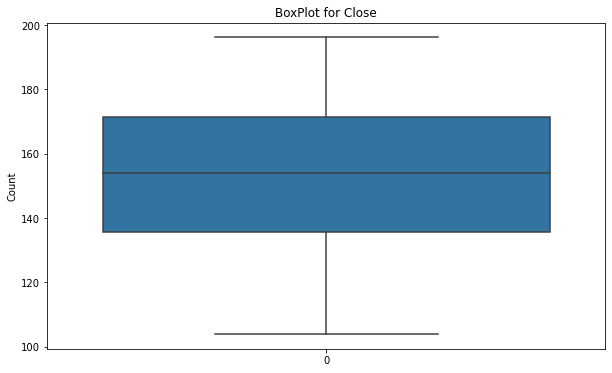

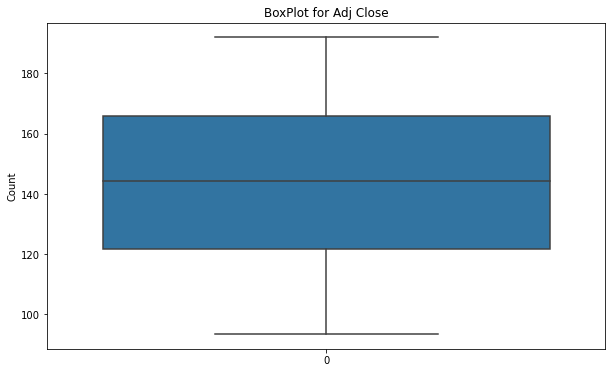

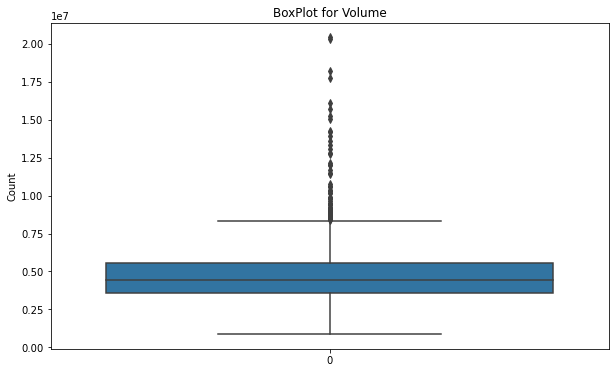


Amazon


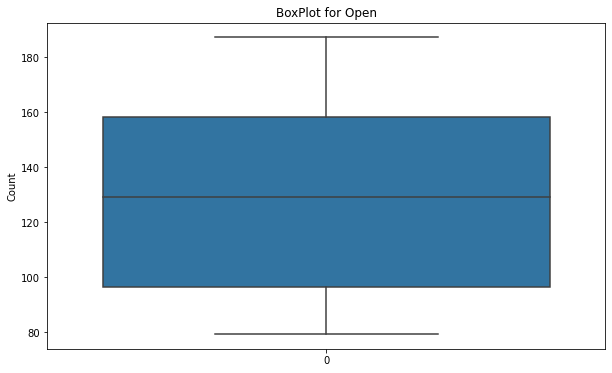

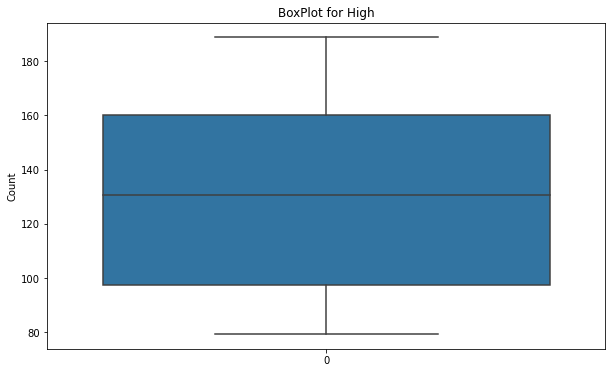

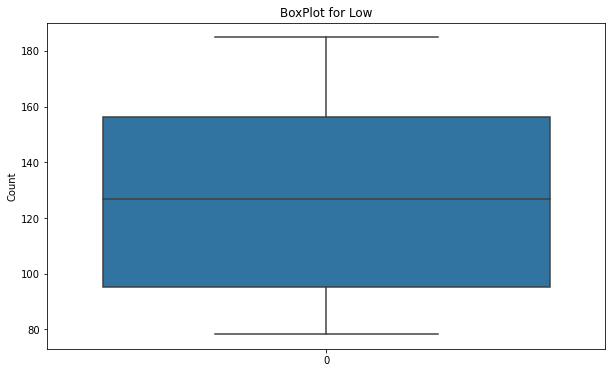

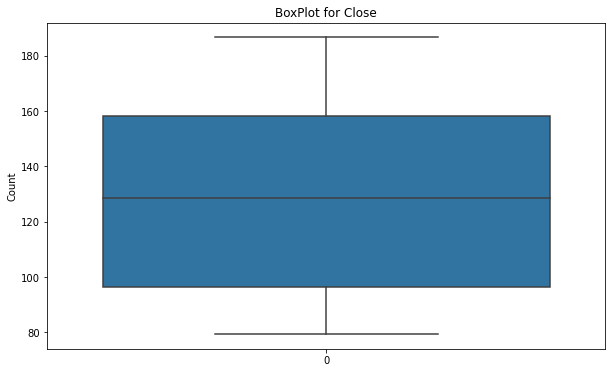

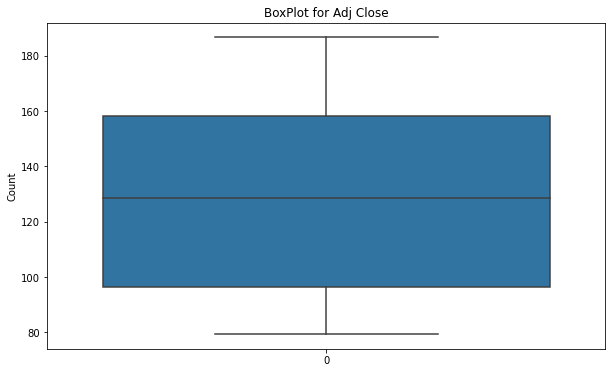

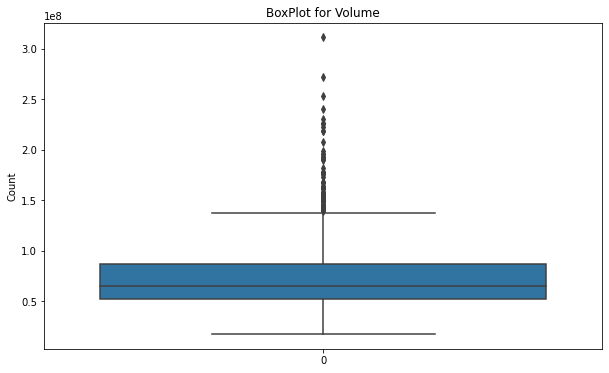


Google


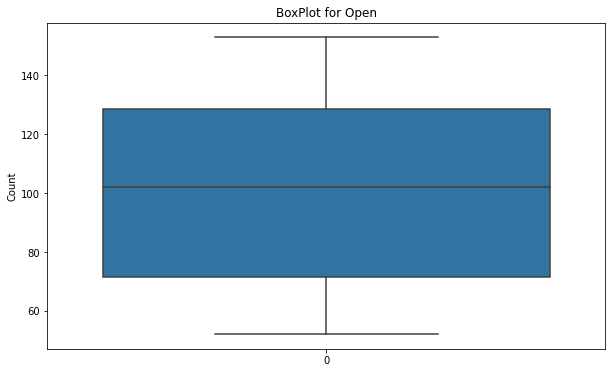

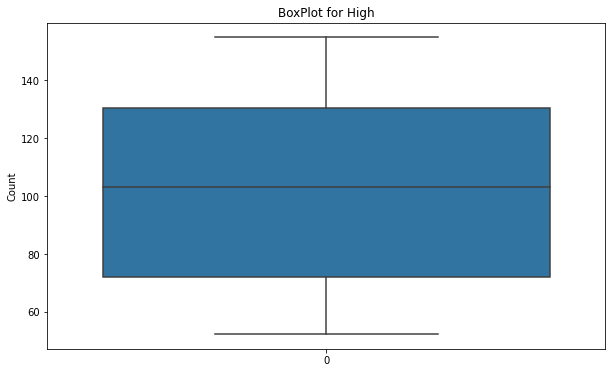

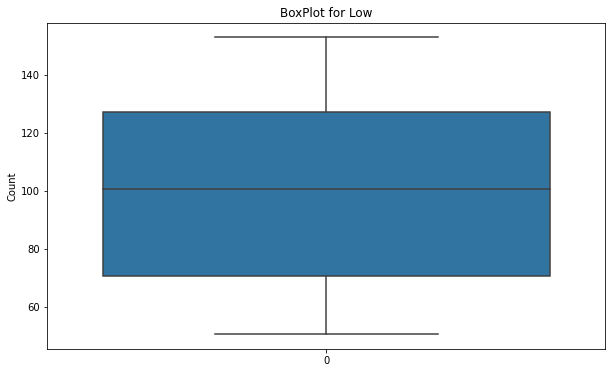

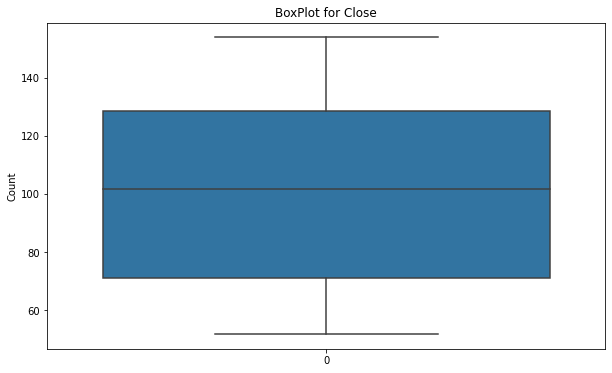

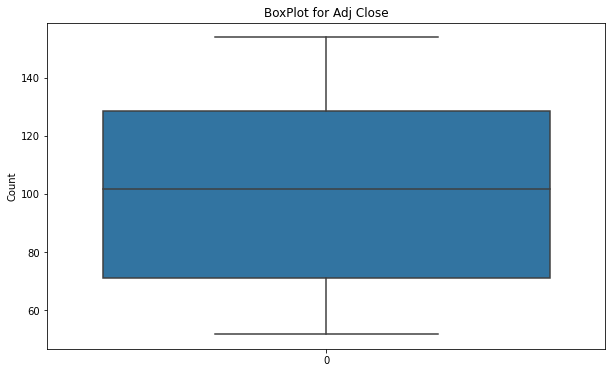

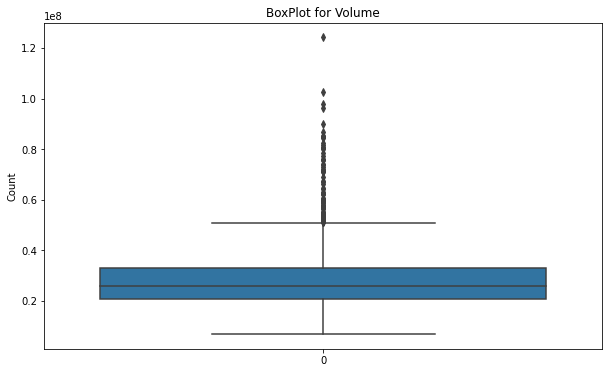


Barnes & Nobles


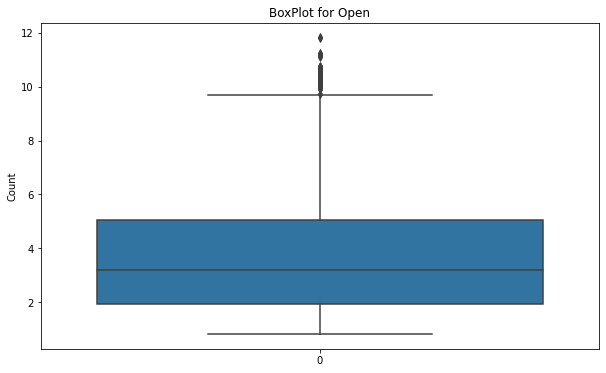

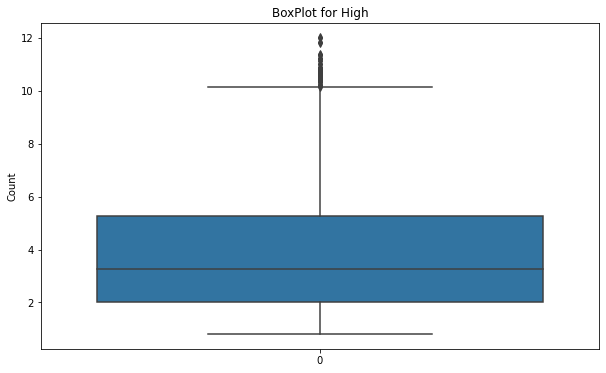

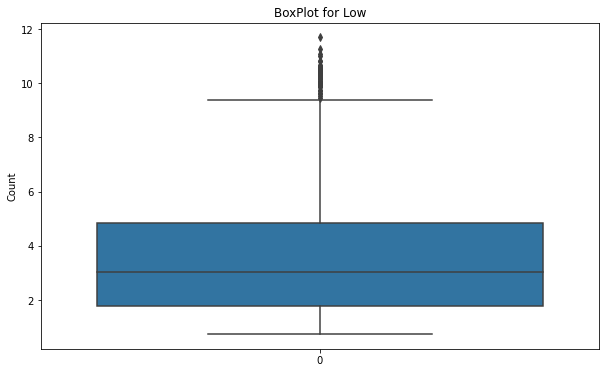

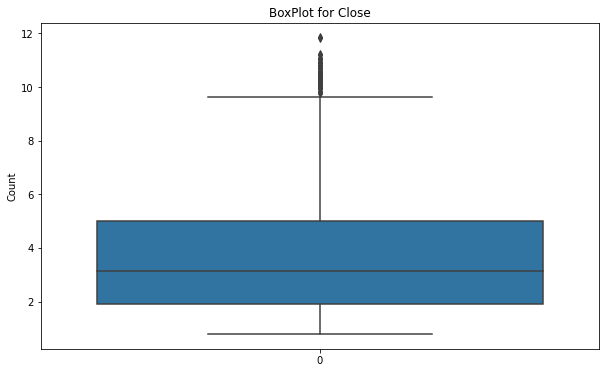

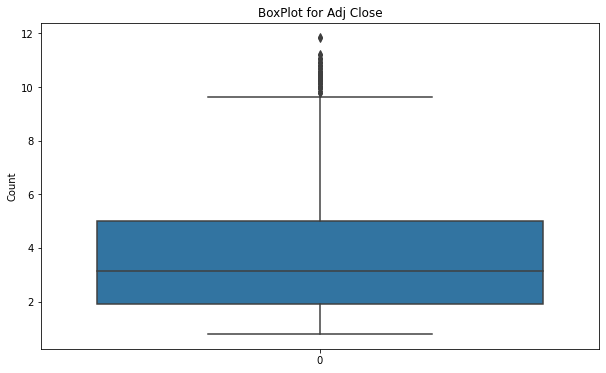

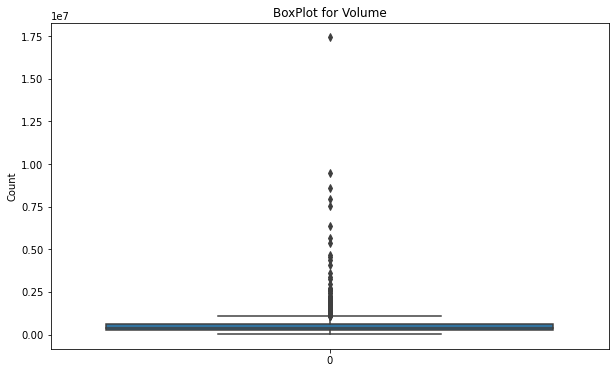

In [7]:
#Visualize the statistical distribution of the relevant features via boxplots
import seaborn as sns
import matplotlib.pyplot as plt
   
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    for index in i[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=i[index])
        plt.title(f'BoxPlot for {index}')
        plt.ylabel('Count')
        plt.show()
        print("")

In [8]:
#Above I see Volume as weakly correlated with the price metrics along with outlier presence depicted in the boxplots
#As a result I opt to remove it to avoid uneccessary complexity since it will not play a role in my modeling for price metrics
for i in Company_List:
    i.drop(['Volume'], axis=1, inplace=True)

In [9]:
#Below I want to view the datatypes of the features and notice the date is an object and not datetime. 
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    print(i.info())
    print("")

Apple
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB
None

Pepsico
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB
None

Amazon
<class 'p

In [10]:
#Change the Date feature datatype to datetime and display the materialized alteration for each Company
for i, i2 in zip(Company_List, Company_Names):
    i['Date'] = pd.to_datetime(i['Date'])
    print(i2)
    print(i['Date'].dtypes)

Apple
datetime64[ns]
Pepsico
datetime64[ns]
Amazon
datetime64[ns]
Google
datetime64[ns]
Barnes & Nobles
datetime64[ns]


In [11]:
#This code is to ensure that each there is five years worth of data for each Company
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    print(i['Date'].dt.year.unique())
    print("")

Apple
[2019 2020 2021 2022 2023 2024]

Pepsico
[2019 2020 2021 2022 2023 2024]

Amazon
[2019 2020 2021 2022 2023 2024]

Google
[2019 2020 2021 2022 2023 2024]

Barnes & Nobles
[2019 2020 2021 2022 2023 2024]



# Data Exploration

In this section I will conduct feature engineering to compute the returns for each company. This will provide better understadning of how an investor has seen materialized results from their stakes in each company from a daily, weekly, and monthly perspective.

In [13]:
#Here I iterate through each company and compute return values for each day while adding them to the company df as a new feature
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    Returns = []
    for O_Val, AC_Val in zip(i['Open'], i['Adj Close']):
        Return_Val = ((AC_Val)/(O_Val))-1
        Returns.append(Return_Val)
    i['Returns'] = Returns
    print(i.head())
    print(" ")

Apple
        Date       Open       High        Low      Close  Adj Close   Returns
0 2019-01-29  39.062500  39.532501  38.527500  38.669998  37.115887 -0.049833
1 2019-01-30  40.812500  41.537498  40.057499  41.312500  39.652184 -0.028430
2 2019-01-31  41.527500  42.250000  41.139999  41.610001  39.937737 -0.038282
3 2019-02-01  41.740002  42.244999  41.482498  41.630001  39.956932 -0.042718
4 2019-02-04  41.852501  42.915001  41.820000  42.812500  41.091900 -0.018173
 
Pepsico
        Date        Open        High         Low       Close  Adj Close  \
0 2019-01-29  108.930000  109.620003  108.510002  109.000000  94.621094   
1 2019-01-30  108.940002  111.239998  108.540001  110.820000  96.201019   
2 2019-01-31  110.970001  112.900002  110.209999  112.669998  97.806969   
3 2019-02-01  112.949997  113.279999  111.449997  112.190002  97.390289   
4 2019-02-04  112.209999  113.400002  111.849998  113.089996  98.171562   

    Returns  
0 -0.131359  
1 -0.116936  
2 -0.118618  
3 -0.1377

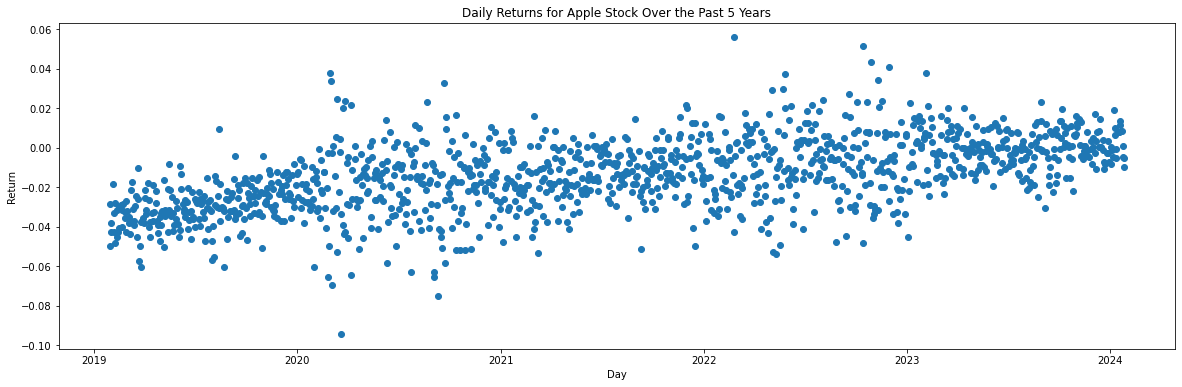

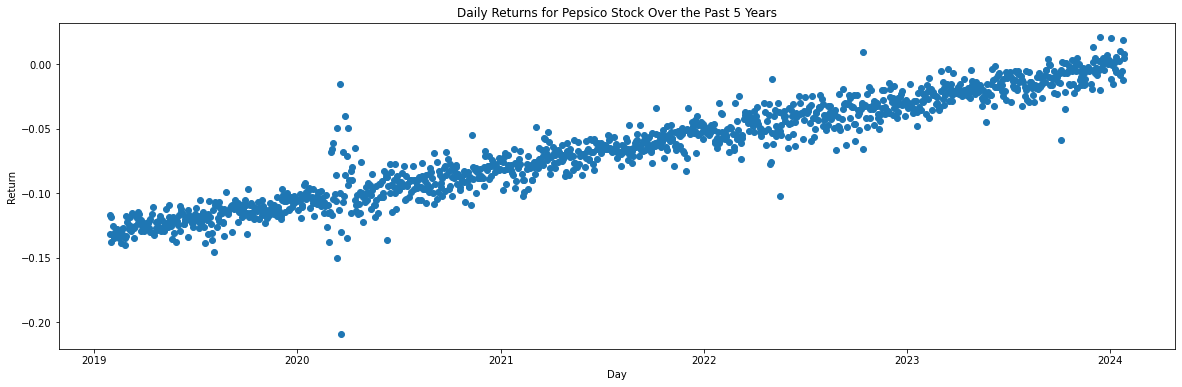

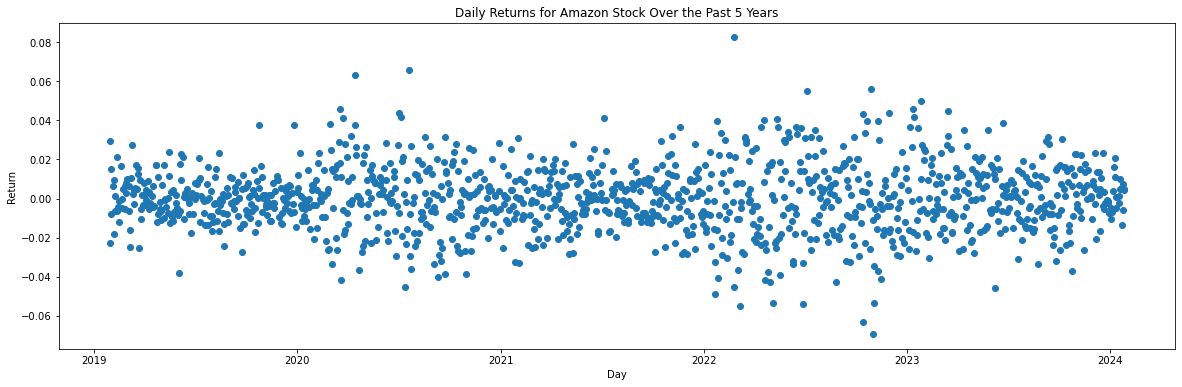

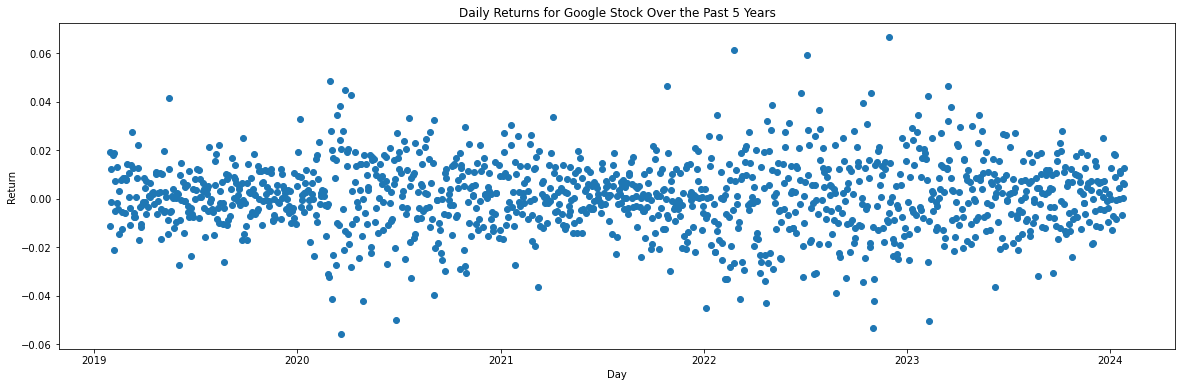

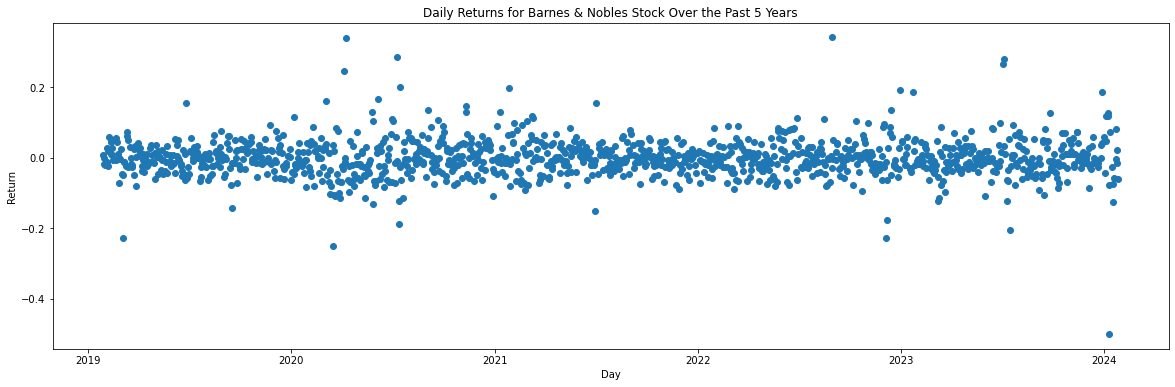

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
#In this block I visualize the daily returns for each company over the past 5 years
for i, i2 in zip(Company_List, Company_Names):
    plt.figure(figsize=(20,6))
    plt.scatter(x = i['Date'], y = i['Returns'])
    plt.xlabel('Day')
    plt.ylabel('Return')
    plt.title(f'Daily Returns for {i2} Stock Over the Past 5 Years')
    plt.show

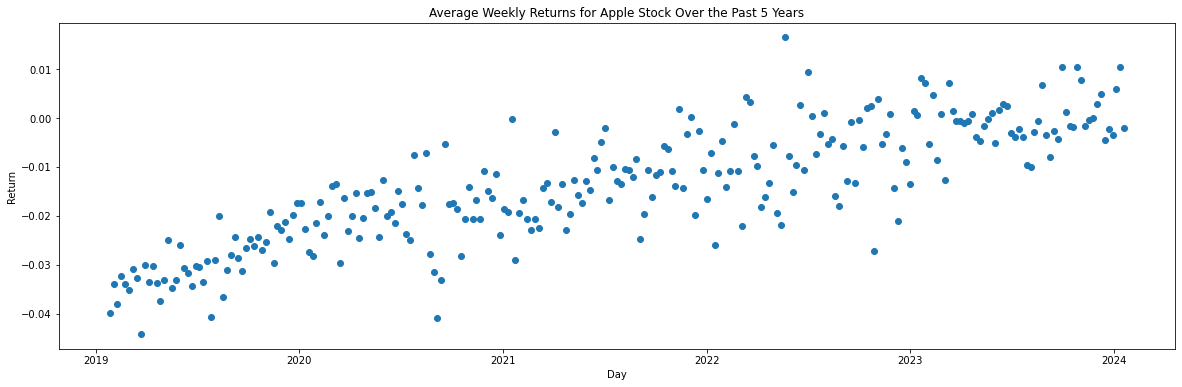

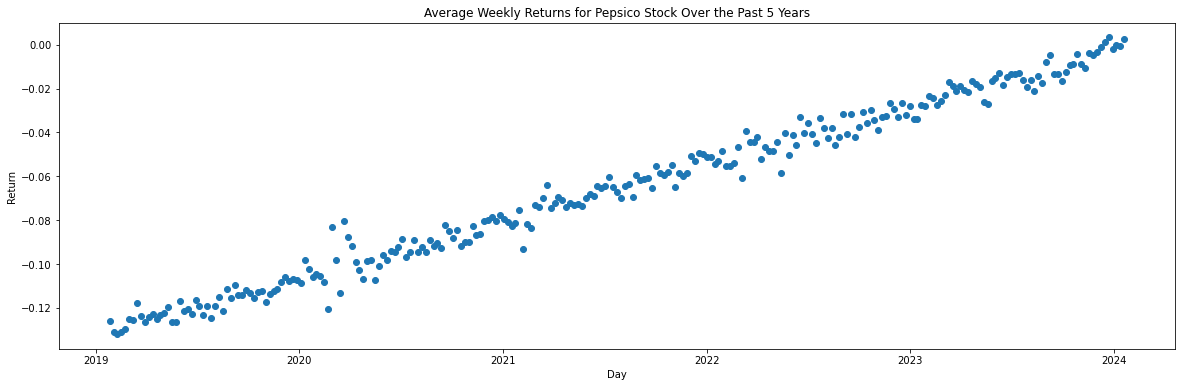

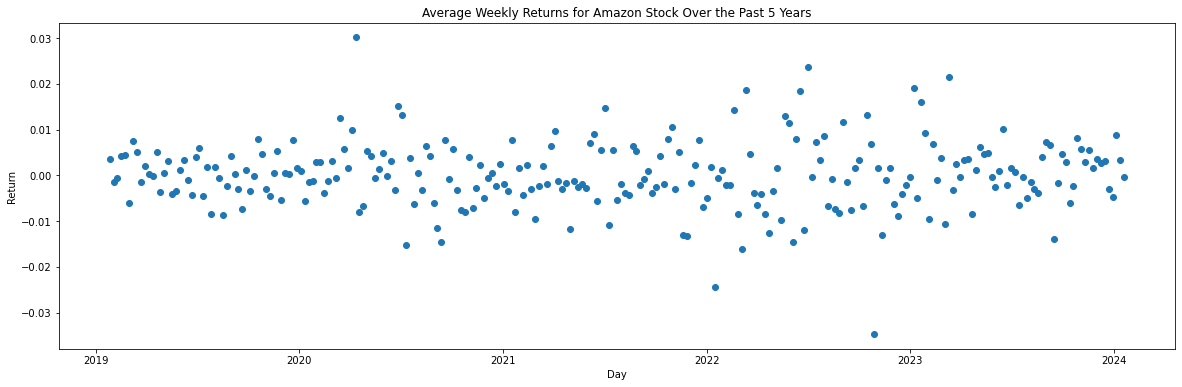

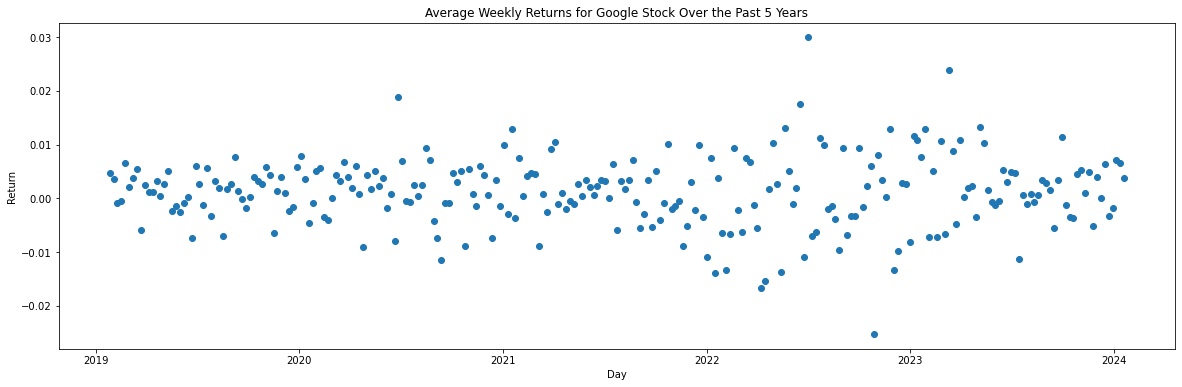

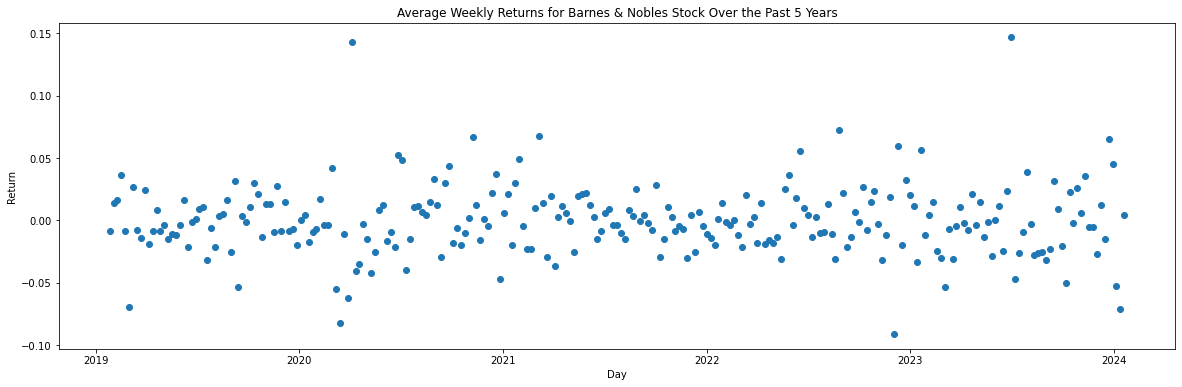

In [22]:
#Below I caluclate and visualize the average weekly retruns for each company over the past 5 years
for i, i2 in zip(Company_List, Company_Names):
    grouped_week = i.groupby(i['Date'].dt.to_period("W-Fri"))['Returns'].agg(list)
    avg_return_week = grouped_week.apply(lambda x: pd.Series(x).mean())
    df_avg = avg_return_week.reset_index()
    df_avg['Date'] = df_avg['Date'].dt.to_timestamp()
    plt.figure(figsize=(20,6))
    plt.scatter(x = df_avg['Date'], y = df_avg['Returns'])
    plt.xlabel('Day')
    plt.ylabel('Return')
    plt.title(f'Average Weekly Returns for {i2} Stock Over the Past 5 Years')
    plt.show
        

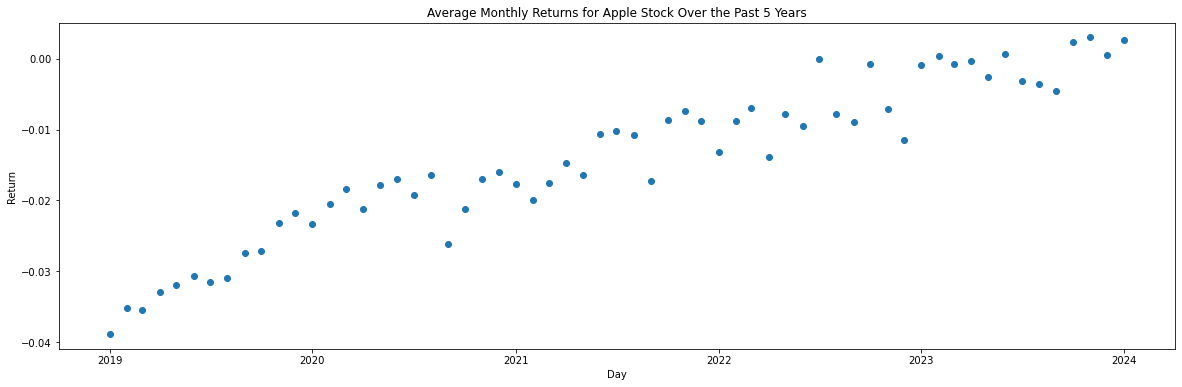

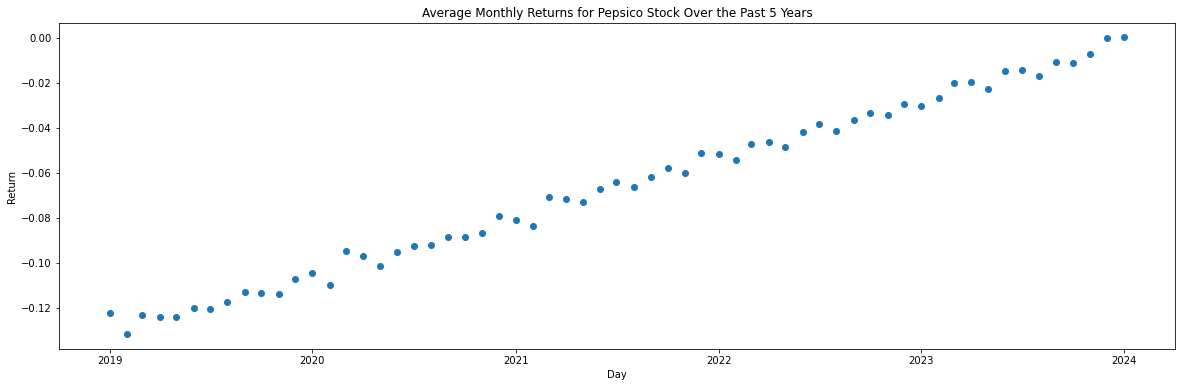

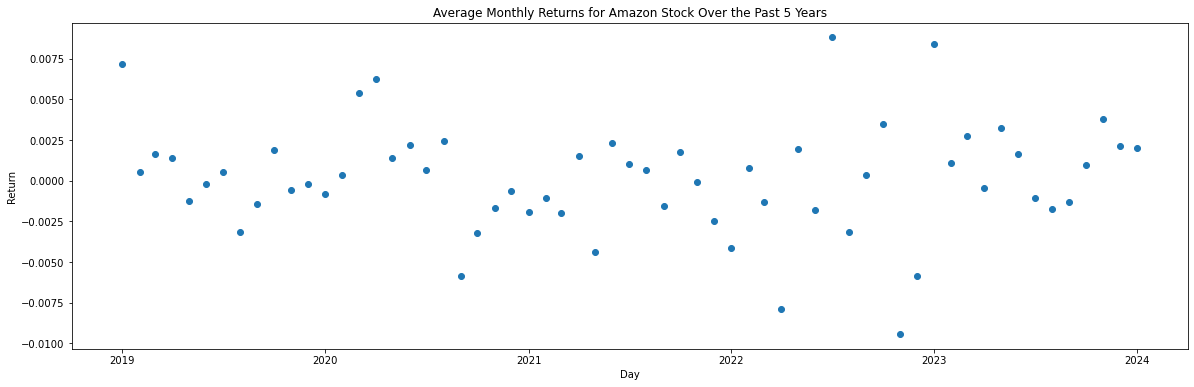

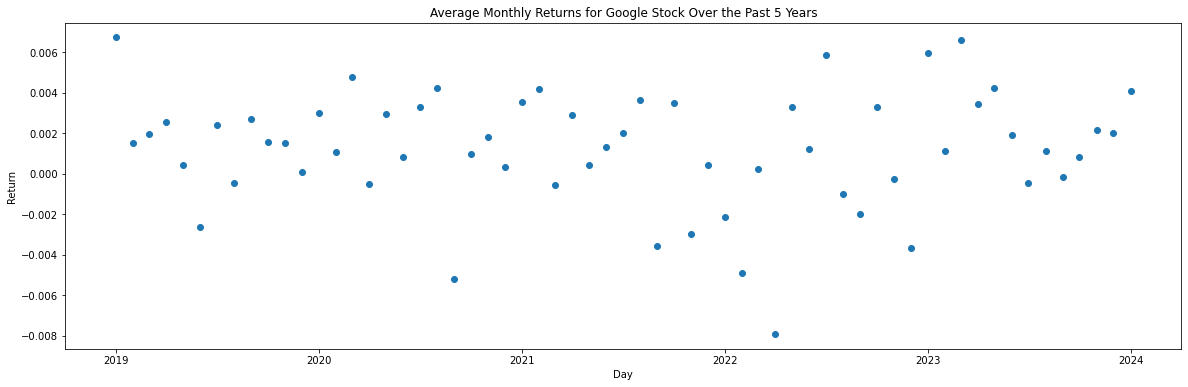

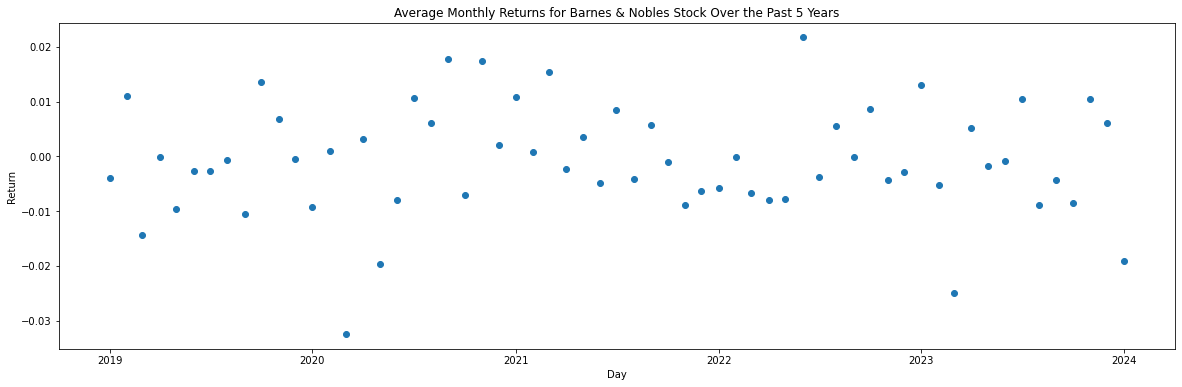

In [23]:
#Below I caluclate and visualize the average monthly returns for each company over the past 5 years
for i, i2 in zip(Company_List, Company_Names):
    grouped_month = i.groupby(i['Date'].dt.to_period("M"))['Returns'].agg(list)
    avg_return_month = grouped_month.apply(lambda x: pd.Series(x).mean())
    df_avg = avg_return_month.reset_index()
    df_avg['Date'] = df_avg['Date'].dt.to_timestamp()
    plt.figure(figsize=(20,6))
    plt.scatter(x = df_avg['Date'], y = df_avg['Returns'])
    plt.xlabel('Day')
    plt.ylabel('Return')
    plt.title(f'Average Monthly Returns for {i2} Stock Over the Past 5 Years')
    plt.show
        

The code below will visualize all of the stock price metrics for each company to gauge any trends, seasonality, and other patterns over the five years.

Apple


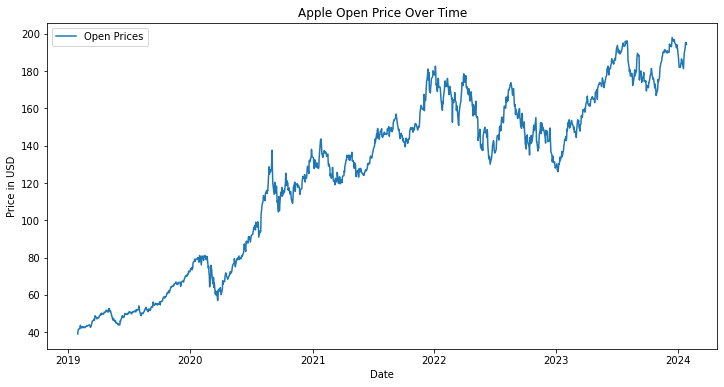

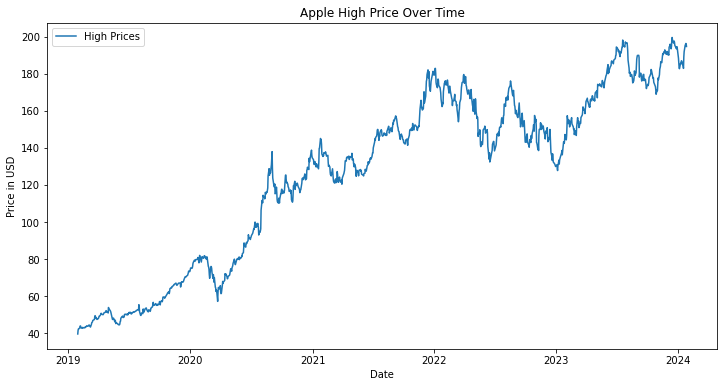

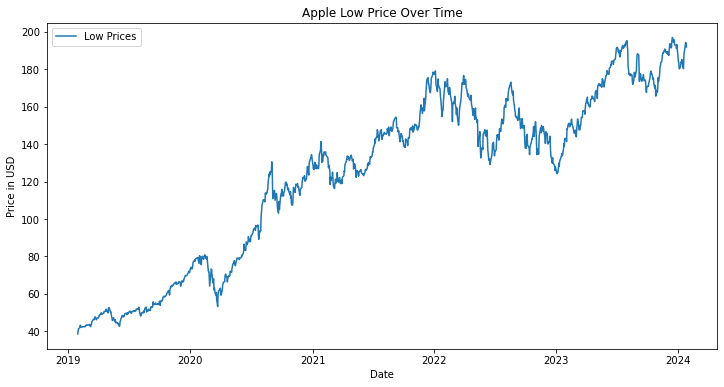

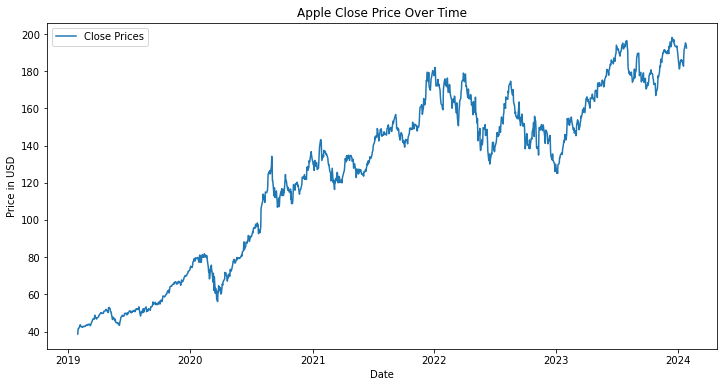

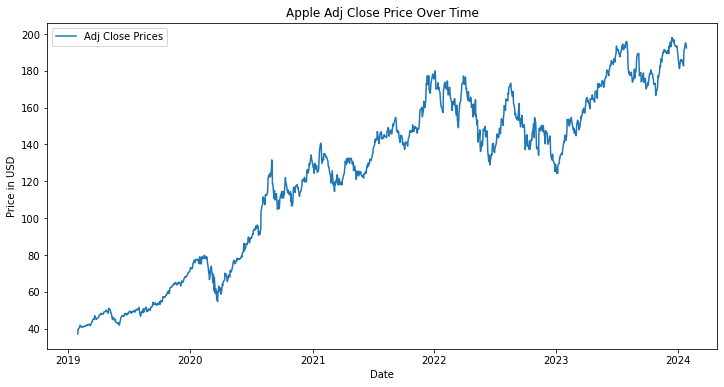

Pepsico


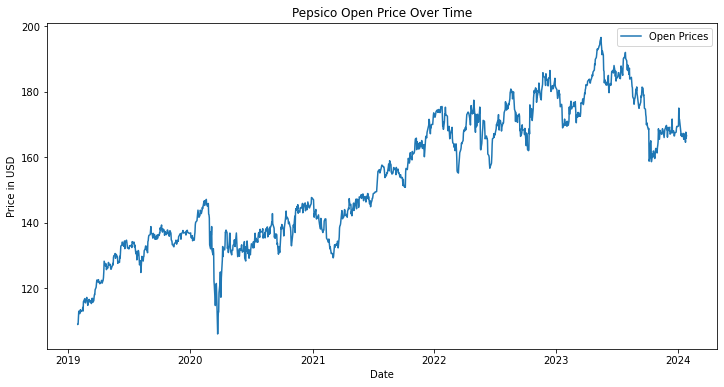

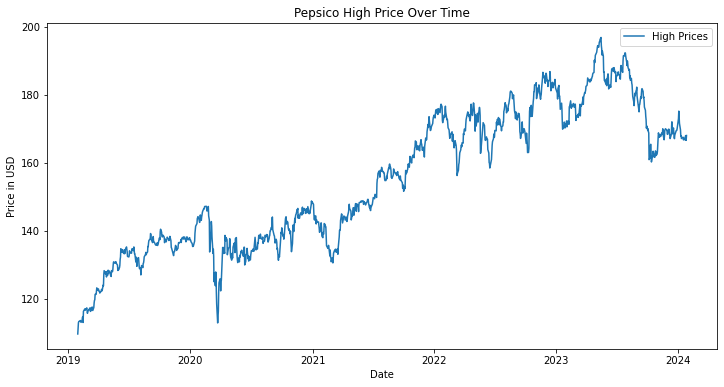

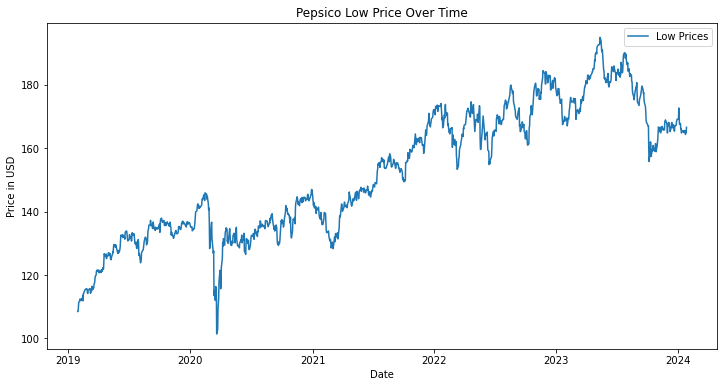

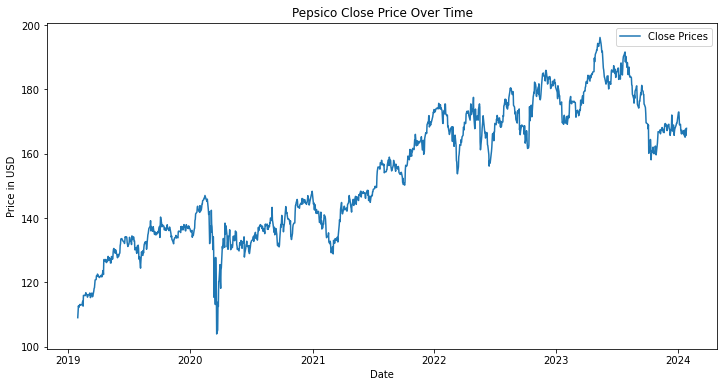

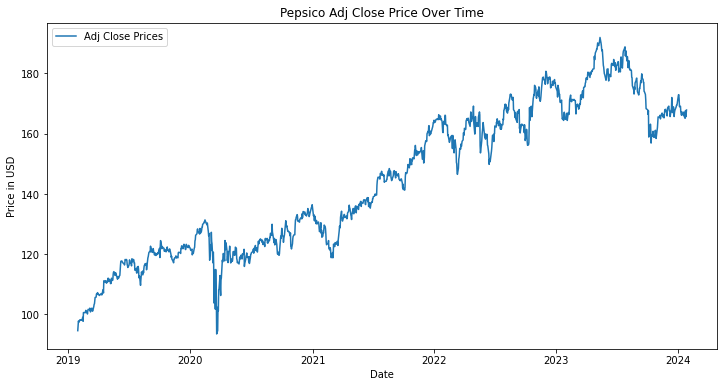

Amazon


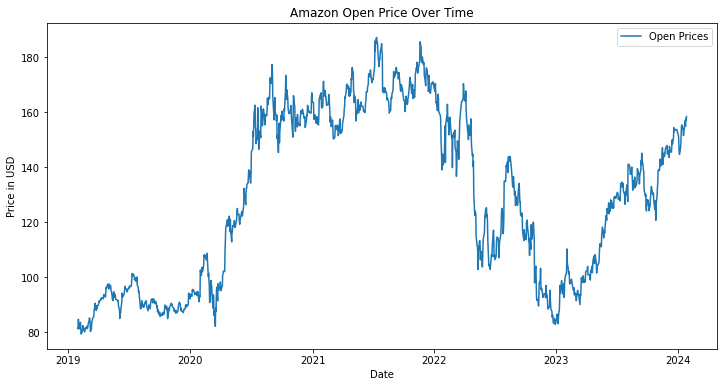

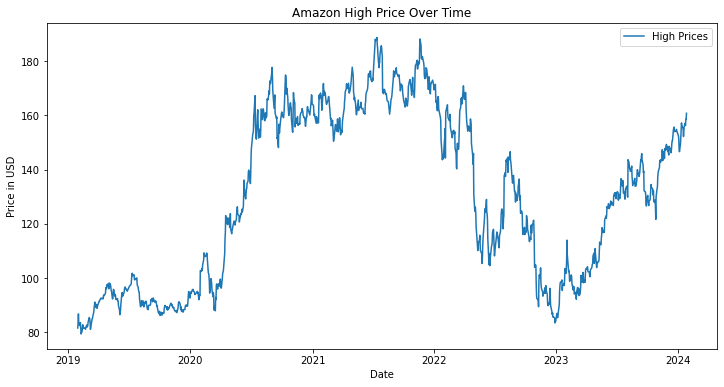

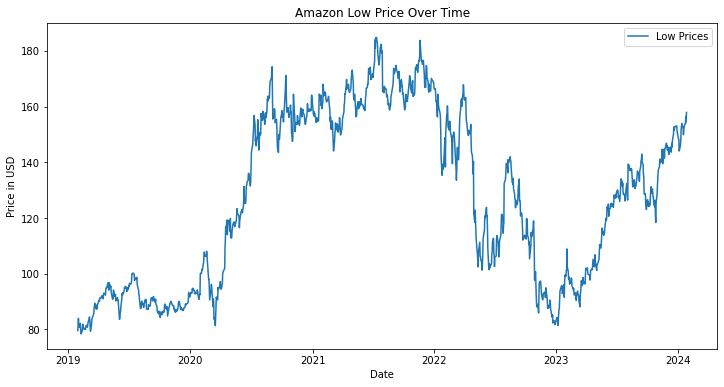

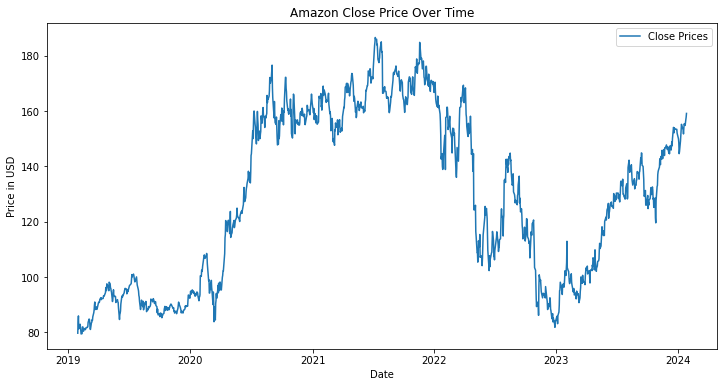

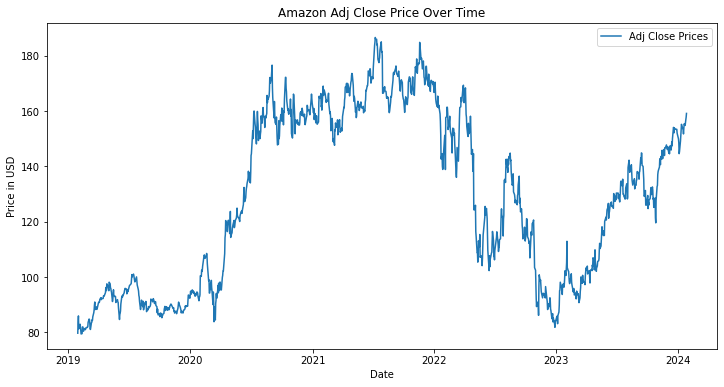

Google


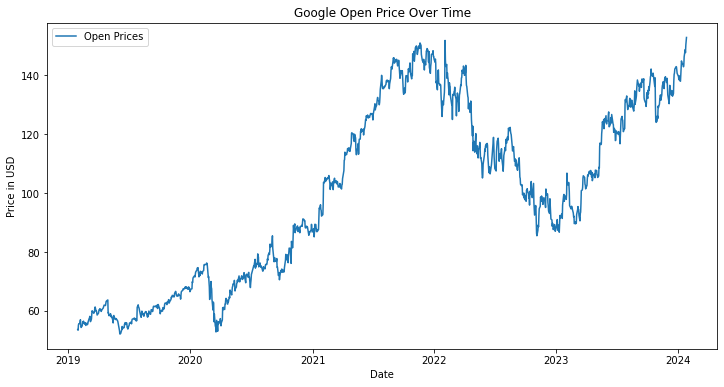

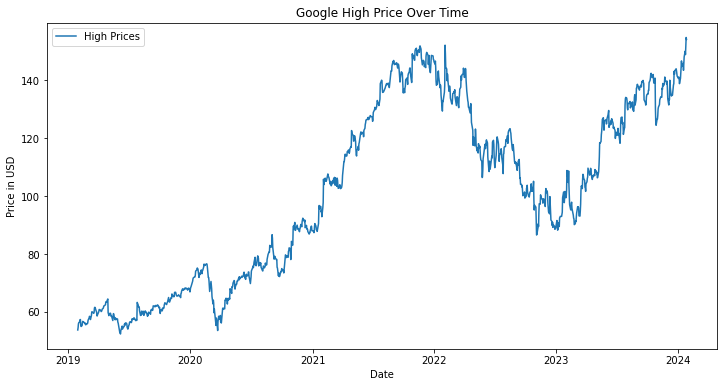

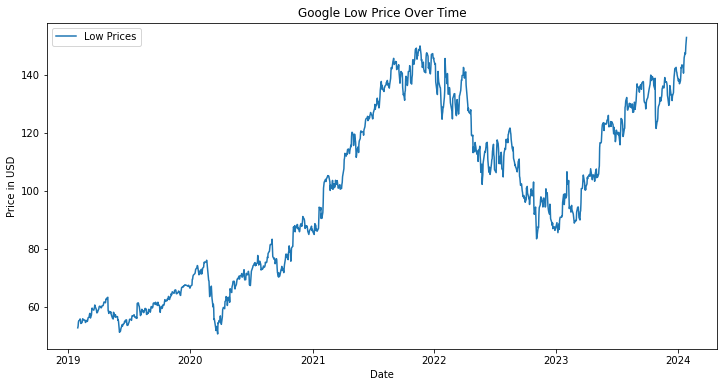

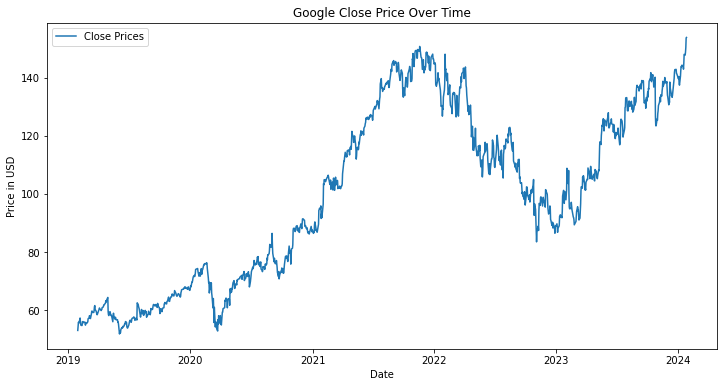

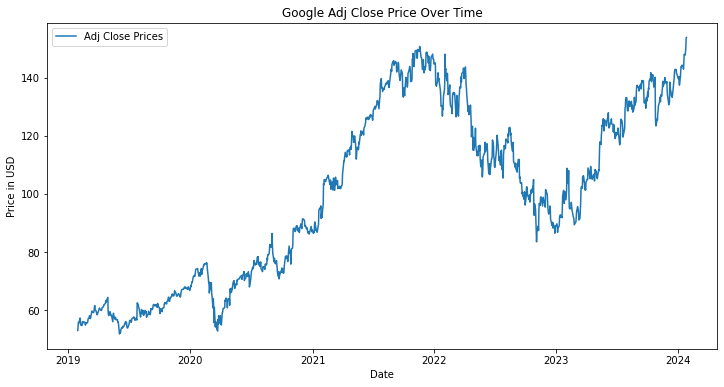

Barnes & Nobles


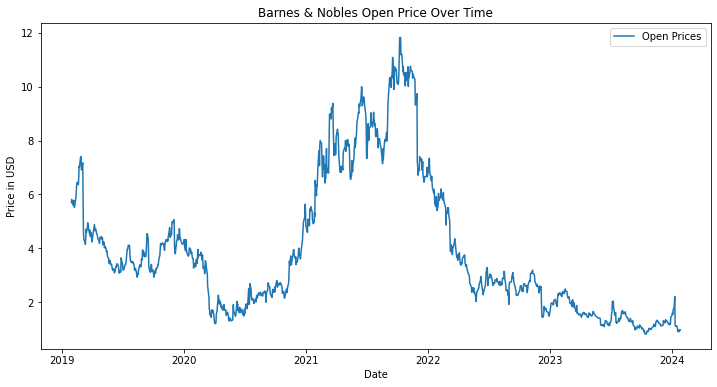

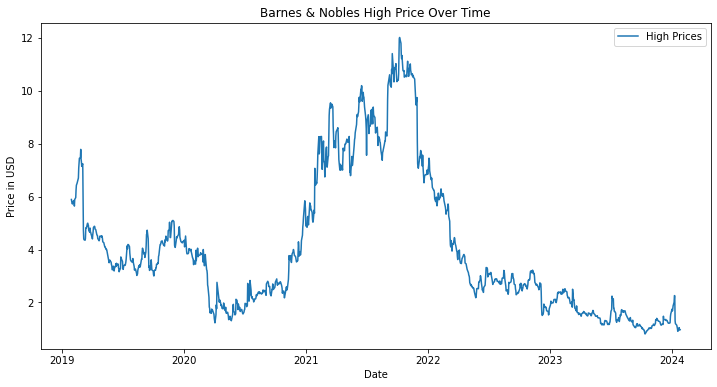

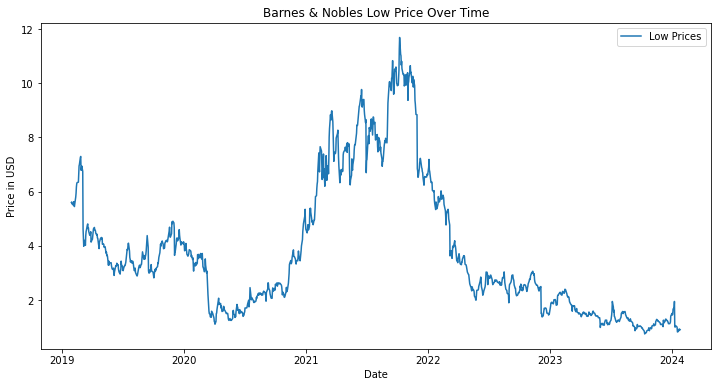

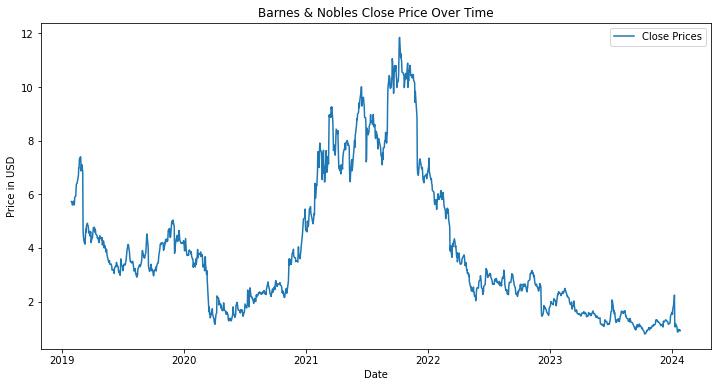

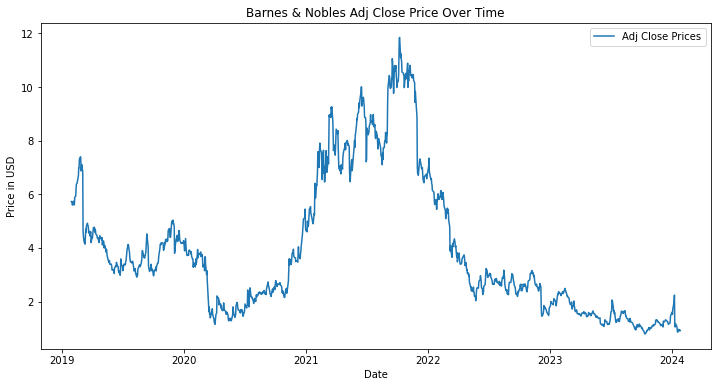

In [18]:
#In this code I visualize time series plots over the five years for the daily data for each price metric while doing so for the 5 companies
import numpy as np
for i, i2 in zip(Company_List, Company_Names):
    print(i2)
    for index in i[['Open', 'High', 'Low', 'Close', 'Adj Close']]:
        Date_Vals = np.array(i['Date'])
        Price_Vals = np.array(i[index])
        plt.figure(figsize=(12, 6))
        plt.plot(Date_Vals, Price_Vals, label=f'{index} Prices')
        plt.title(f'{i2} {index} Price Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price in USD')
        plt.legend()
        plt.show()



# Modeling

**Breakdown of the technqiues that will be employed in the modeling procedure**

For my solution to the issue of predicting stock price metrics (Open, High, Low, Close, Adj Close), I will employ a user interactive procedure where the user chooses one of the 5 companies along one of the 5 metrics to model. One model will be a statistical ETS model which will account for seasonality and overall trend in the data to train and evaluate on the test set. A second model will be another statistical method, ARIMA, that will factor in the ACF and PACF of the data via the autoregressive and moving average components respectively along with trend via integrated element. The third model will be a LSTM model which learns from the previous n values, user specified, to learn how they impact the 11th value in a rolling window practice. Essentially I break up a multitude of training array's of n values to train alongside their target value, y_train, which is the n + 1 value. This iterates for the entire training set and is subsequently tested. I will experiment below to determine what value I will use for n given the project context. Following the creation of the models, I will determine which is most suitable given their performance and the context of the Data Science problem at hand. Following this I will employ the optimal one in generating a 10 day forecast for whichever metric the user chooses by implementing the same rolling window methodology to execute this recursive forecasting. As an additional note I am going to conduct this process with Apple Open price however feel free to interact with any of the companies and their stock price features in this section. 

**ETS Model**

In [19]:
#This is to import the necessary libraries for this process
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Here I incorporate user interaction by allowing them to pick a company of the options which they want to model
User_Company = int(input('Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles '))
if User_Company == 1:
    Company = df_apple
    Name = 'Apple'
if User_Company == 2:
    Company = df_pepsi
    Name = 'Pepsi'
if User_Company == 3:
    Company = df_amazon
    Name = 'Amazon'
if User_Company == 4:
    Company = df_google
    Name = 'Google'
if User_Company == 5:
    Company = df_barnes
    Name = 'Barnes & Nobles'

#I implement user interaction here as well and allow for the user to choose which metric they wish to model
Metric = str(input('Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj Close, Volume'))
Price = Company[Metric]
x = []
y = []
#I am going to employ a train test split that is only 10 last values for test data. This is due to the fact that the goal of
#this project is to be able to forecast 10 days accruatley so I am going to see how well this model could hypothetically 
#Forecast percived furture 10 days via the test data.
n = 10
x_train_ETS = Price.iloc[:-10]
x_test_ETS = Price.tail(10)
#I opt for addive trend due to the trends generally having a general direction that can have a LOBF. Seasonal is mult and 12 since time series and complexity
model_ETS = ExponentialSmoothing(x_train_ETS, trend='add', seasonal='mul', seasonal_periods=12)
fit_model_ETS = model_ETS.fit()
predictions_ETS = fit_model_ETS.forecast(steps=len(x_test_ETS))
mse_ETS = mean_squared_error(x_test_ETS, predictions_ETS)

print(f'MSE of:{mse_ETS}')

Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles 1
Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj Close, VolumeOpen
MSE of:29.218279309903515


The MSE of 29.21 is not necesarily encouraging but without a relative standard it cannot yet be determined if it is poor. I will pivot to ARIMA next to evaluate another model and try an establish some benchmark for a good MSE. 

**ARIMA Model**

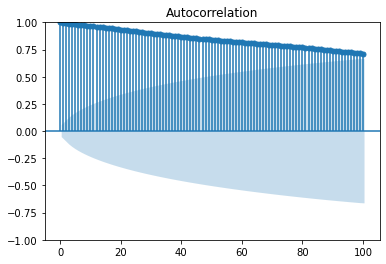

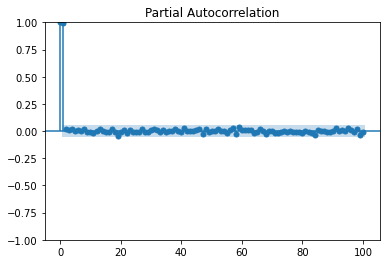

In [20]:
#Here I plot the Autocorrelation and PArtial Autocorrelation to gauge what suitable values for the Autoregressive and 
#Moving Average paramters will be respectviley
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Price, lags=100)
plt.show()
plot_pacf(Price, lags=100)
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
#Here I incorporate user interaction by allowing them to pick a company of the options which they want to model
User_Company = int(input('Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles '))
if User_Company == 1:
    Company = df_apple
    Name = 'Apple'
if User_Company == 2:
    Company = df_pepsi
    Name = 'Pepsi'
if User_Company == 3:
    Company = df_amazon
    Name = 'Amazon'
if User_Company == 4:
    Company = df_google
    Name = 'Google'
if User_Company == 5:
    Company = df_barnes
    Name = 'Barnes & Nobles'

#I implement user interaction here as well and allow for the user to choose which metric they wish to model
Metric = str(input('Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj Close, Volume'))
Price = Company[Metric]
x = []
y = []
n = 10
x_train_ARIMA = Price.iloc[:-10]
x_test_ARIMA = Price.tail(10)
#I opt for a MA of 2 due to the 2 PACF spikes, AR of 3 since there is persistent ACF due to timne series nature of the data
#In addition an integerated of 1 since there is a overall positive trend in the Apple Open prices as per the EDA
order = (3, 1, 2)  
model_ARIMA = ARIMA(x_train_ARIMA, order=order)
fit_model_ARIMA = model_ARIMA.fit()
predictions_ARIMA = fit_model_ARIMA.forecast(steps=len(x_test_ARIMA))
mse_ARIMA = mean_squared_error(x_test_ARIMA, predictions_ARIMA)
print(f'MSE of:{mse_ARIMA}')

Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles 1
Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj Close, VolumeOpen
MSE of:39.31634678513133


This MSE of 39.32 for ARIMA depicts this as worse than ETS however without intricate hyperparameter tuning coming to a deterination of this nature with conviction is premature. Both these models may be revsisted and refined however I am going to progress to the LTSM Model and see how this will perform

**LSTM Model**

Due to the impact of recent values of the subsequent value, I am going to employ a window sliding approach in training, testing and forecasting my model. Essentially, this means I am going to create a training set via an iterative procedure of taking the first n values into the training paired with the n + 1 value as the target. Following this I will configure the logic of the code to slide forward one value and retrain off of this new window and the subsequent target. This will be repeated for eighty percent of the data. Subsequently, 20 percent of the total data will be trained on with the n value groupings for x_test and their respective 11th value in the y_test. Essentially, this will take these x_test values as input and predict them against the y_test target. From these predictions against the actuals we will compute an MSE value. In addition, this process will allow this model to be applied to build the tool as described above to take in n price values from a user and compute a predicted value for the next day given the company and price metric.

In [79]:
#Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


#Here I incorporate user interaction by allowing them to pick a company of the options which they want to model
User_Company = int(input('Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles '))
if User_Company == 1:
    Company = df_apple
    Name = 'Apple'
if User_Company == 2:
    Company = df_pepsi
    Name = 'Pepsi'
if User_Company == 3:
    Company = df_amazon
    Name = 'Amazon'
if User_Company == 4:
    Company = df_google
    Name = 'Google'
if User_Company == 5:
    Company = df_barnes
    Name = 'Barnes & Nobles'



#Here I will train my LSTM model to predict the an Open, CLose, High, Low, Adj close price of a day based on the relative previous 10 days of stock prices
#I implement user interaction here as well and allow for the user to choose which metric they wish to model
User = str(input('Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj Close'))
n = int(input('Enter the number of previous days {User} data you want to base the prediction on. Enter a whole number.'))


#Below creates the train and test solit by iterating through the window size specifed by the amount of days the user wnats to base the prediction off of

Price = Company[User]
x = []
y = []
#This loop is going to iterate through the data and create the groupings of 10 values assigned to A and their target values to B with them appended to x and y respectivley to consolidate them
for i in range(len(Price) - n):
    end = i + n
    A = Price.iloc[i:end].values
    B = Price.iloc[end-1]
    x.append(A)
    y.append(B)
#Here I will train my LSTM model to predict the an Open, CLose, High, Low, Adj close price of a day based on the relative user specified previous days of stock prices
#the below code executes specifics to prepare the varaibles to be passed as parameters into the functions. Features is 1 due to only one being utilized
features = 1
x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], features))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)
#Sequential is used since this is straightforward time series data 
model = Sequential()
#Set the layer to 100 neurons after experimenting to given the model the ability to capture intricate patterns without being overly complex
#I use an activation of relu due to the nonlinearlity of the patterns in the data coupled with their consistent positve values
#n is set as this value is 10 and tells the model to look 10 values back from a point to undertsand to patterns from those 10 with respect to their impact on sadid point
model.add(LSTM(100, activation='relu', input_shape=(n, features)))
#Here I employ a dense value of 1. This is because this serves as the output layer and I am predicting just one continuous value in this model at each iteration so this faciliates this.
#Essentially, the dense layer with one neuron allows for the single predicted value to be rendered
model.add(Dense(1))
#Here I choose the adam optimizer as this is a commonly employed versatile optimizer. I may experiment with this is the MSE is poor
model.compile(optimizer='adam', loss='mse')
#This fits the model onto my training sets and epochs of 50 indicates the model will iterate over the training data 50 times to pick up patterns.
#Depending on performance speed and accuracy of the model I may adjust epochs. Verbose is 0 to avoid the prpgress bar info
model.fit(x_train, y_train, epochs=50, verbose=0)
#This evaluates the model againts the test data in accordance with the mse specified above as the metric
loss = model.evaluate(x_test, y_test)
print(f'LSTM Model Loss on Test Data: {loss} MSE')


Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles 1
Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj CloseOpen
Enter the number of previous days {User} data you want to base the prediction on. Enter a whole number.25
8/8 [==============================] - 0s 8ms/step - loss: 6.8870
LSTM Model Loss on Test Data: 6.887028217315674 MSE


LSTM model performs quite well in comparison with an MSE of 5.64. While this is excellent, context is needed with regards to comparing LSTM itself towards the other modeling methods since in addition to the difference of modeling technique, the rolling window approach provides another discrepancy. In addition, this mse is with respect to predicting one value at a time from the window. As an additional note, since this was executed with the knowledge of a 10 day forecast being an end result, I experimented with some window values and ultimately settled on 25. In the context of this time series data, the previous value is such a strong indicator of the next value. The acf plot confirms this and also shows how additional values before are also similar with a decreasing result as lags grow. Essentially this rolling window practice harnesses the autoregressive nature of time series data. As a result, I wanted to find a window value that has a balance of enough values to learn the short term patterns prior to a prediction while not being too distanced from the current value. Given that we are predicting a 10 day forecast, the short term patterns within 25 days prior to a prediction appear to be quite a viable and balanced option. The collective impact of the LSTM technique, the rolling window, and the single prediction provide the above model with this excellent performance. As a result I will focus on using this to model a 10 day forecast by employing a recursive forecasting practice in order to slide the window into the future.

In [80]:
#This block encapsulates the logic for recursive forecasting by sliding the window with predcited values until I get 10 days into the future

#Here I add the last n values to a list and convert it to an array so that it can be passed through the trained model
last_n_values = []
for i in Company[User].tail(n):
    last_n_values.append(i)
x_input = np.array(last_n_values)
Forecast_10_Days = []
#This now predicts off of the last 10 values to get a future value while iterating over this and "sliding the window" into the future
for i in range(10):
    x_input = np.array(last_n_values)
    x_input = x_input.reshape((1, n, features))
    Prediction = model.predict(x_input, verbose=1)
    print(Prediction)
    for i in Prediction[0]:
        Prediction = float(i)
    Forecast_10_Days.append(Prediction)
    last_n_values.pop(0)
    last_n_values.append(Prediction)
#I remove the oldest value when a new one is predicted and the widnow is slid to preserve the n magnitude of the window in alignment with how the model was trained
print(Forecast_10_Days)

1/1 [==============================] - 0s 189ms/step
[[196.44061]]
1/1 [==============================] - 0s 18ms/step
[[196.68745]]
1/1 [==============================] - 0s 15ms/step
[[194.90416]]
1/1 [==============================] - 0s 26ms/step
[[195.48016]]
1/1 [==============================] - 0s 26ms/step
[[197.55002]]
1/1 [==============================] - 0s 31ms/step
[[198.79752]]
1/1 [==============================] - 0s 34ms/step
[[199.72261]]
1/1 [==============================] - 0s 22ms/step
[[200.39758]]
1/1 [==============================] - 0s 31ms/step
[[201.91064]]
1/1 [==============================] - 0s 33ms/step
[[202.10695]]
[196.44061279296875, 196.6874542236328, 194.90415954589844, 195.48016357421875, 197.55001831054688, 198.79751586914062, 199.7226104736328, 200.3975830078125, 201.91064453125, 202.10694885253906]


In [81]:
#This gets dates for the future 10 values 
forecast_dates = pd.date_range(start=Company['Date'].max() + pd.DateOffset(1), periods=10, freq='D')
#This converts to datetime
forecast_dates = pd.to_datetime(forecast_dates)

#this creates the df for the forecast and shows it
df_forecast = pd.DataFrame({'Date': forecast_dates, f'{User} Price Forecasted Values': Forecast_10_Days})
df_forecast

,Date,Open Price Forecasted Values
0,2024-01-27,196.440613
1,2024-01-28,196.687454
2,2024-01-29,194.904160
3,2024-01-30,195.480164
4,2024-01-31,197.550018
5,2024-02-01,198.797516
6,2024-02-02,199.722610
7,2024-02-03,200.397583
8,2024-02-04,201.910645
9,2024-02-05,202.106949


In [82]:
#This creates a new df as a merge of the actual data and the forecast so I can use it to create a visualization
df_merge = pd.merge(Company[['Date', User]], df_forecast, on='Date', how='outer')
df_merge

,Date,Open,Open Price Forecasted Values
0,2019-01-29,39.062500,NaN
1,2019-01-30,40.812500,NaN
2,2019-01-31,41.527500,NaN
3,2019-02-01,41.740002,NaN
4,2019-02-04,41.852501,NaN
...,...,...,...
1263,2024-02-01,NaN,198.797516
1264,2024-02-02,NaN,199.722610
1265,2024-02-03,NaN,200.397583
1266,2024-02-04,NaN,201.910645


In [83]:
#This creates arrays for the relevant features in the merged df to forecast off of
Actual = np.array(df_merge[User])
Forecast = np.array(df_merge[f'{User} Price Forecasted Values'])
Date = df_merge['Date']
Date = np.array(Date)

# Results and Visualizations

As described above, the context of how the models are configured and subsequently executed is integral in understanding what an evaluation score such as MSE is truly detailing. When first viewing the MSE for each model, one can notice how the LSTM model scores notably better and while this is accurate, it is due to a variety of components in addition to the LSTM method. Despite this, I would argue that the ML and DL nature of the LSTM model allows it to be trained on a set of data that is broken down via the window rolling process with a window of values to train on a target value of the same feature. ETS and ARIMA as statistical models would lack the ability to uptake data via this procedure of separate X and Y values to learn patterns wioth regards to X predicting Y. As a result, I would say the LSTM model itself and its ability to take in data learned from this iterative window breakdown provides just reasoning to substantiate this excellent score and functionality given the contetx of this Data Science problem being solved. While ETS edged out ARIMA in MSE, the strong performance of the LSTM model led me to pursue this route and prepare the creation of a 10 day forecast via iterative recursive forecasting by essentially sliding the window into the future. This forecast is visualized once with all the dates and another with a more concise window to provide more detail to the forecast. Visually, the forecast exhibits an overall upward trend with fluctuations as common with stock data. A depiction of the LSTM model predicting against the actual values in the test data is displayed as well. 

8/8 [==============================] - 0s 8ms/step


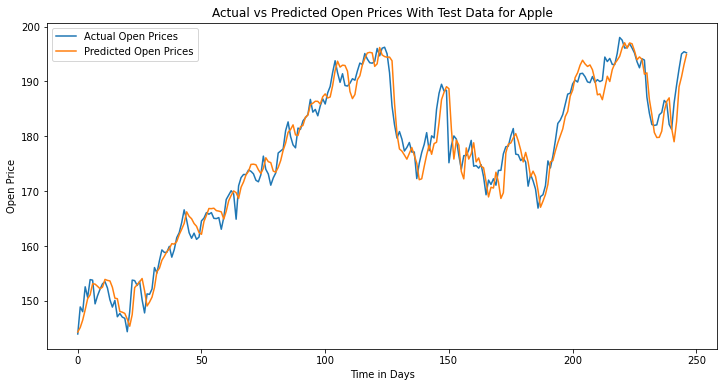

In [91]:
#The first visual I show is the predictions against the test data
import matplotlib.pyplot as plt

#This uses the trained model to make predictions on the test set
predictions = model.predict(x_test)
#Here I build a plot to show the models predcitions against the actual test set data
plt.figure(figsize=(12, 6))
plt.plot(y_test, label=f'Actual {User} Prices')
plt.plot(predictions, label=f'Predicted {User} Prices')
plt.title(f'Actual vs Predicted {User} Prices With Test Data for {Name}')
plt.xlabel('Time in Days')
plt.ylabel(f'{User} Price')
plt.legend()
plt.show()


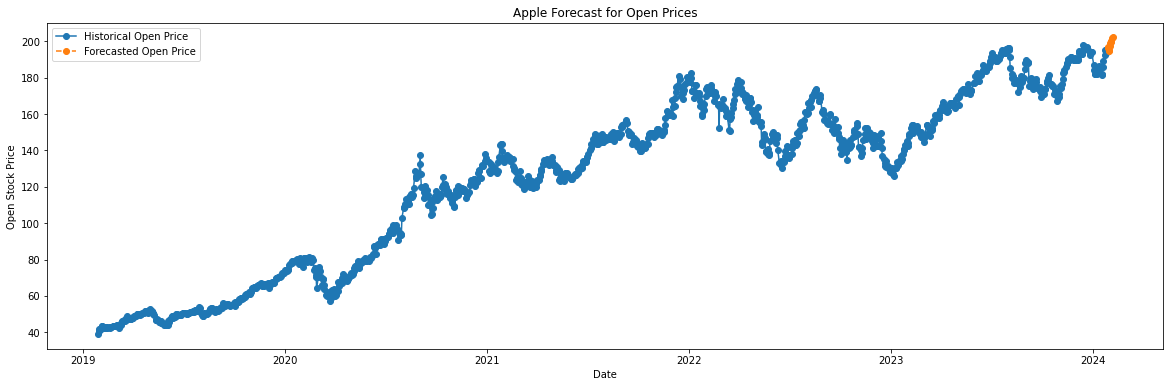

<Figure size 1440x432 with 0 Axes>

In [86]:
#This plots the forecast for the future 10 days 
#Going to look to narrow down the date range in another one to show more of the forecast 
plt.figure(figsize=(20, 6))
plt.plot(Date, Actual, label=f'Historical {User} Price', marker='o', linestyle='-')
plt.plot(Date, Forecast, label=f'Forecasted {User} Price', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel(f'{User} Stock Price')
plt.title(f'{Name} Forecast for {User} Prices')
plt.legend()  
plt.figure(figsize=(20, 6))
plt.show()

In [87]:
#This shortenes the dates of the actual values so that a smaller portion of dates closer to the present are depicted 
#This allows for more of the forecast to be shown.
Actual_Shortened = df_merge[User].iloc[1200:]
Actual_Shortened = np.array(Actual_Shortened)
Date_Shortened = df_merge['Date'].iloc[1200:]
Date_Shortened = np.array(Date_Shortened)

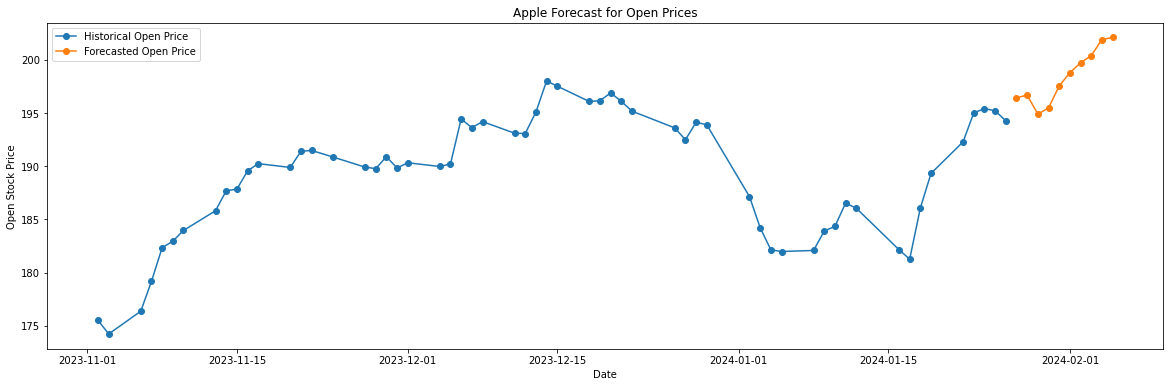

<Figure size 1440x432 with 0 Axes>

In [89]:
#This plots the concise forecast for the future 10 days
plt.figure(figsize=(20, 6))
plt.plot(Date_Shortened, Actual_Shortened, label=f'Historical {User} Price', marker='o', linestyle='-')
plt.plot(Date, Forecast, label=f'Forecasted {User} Price', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel(f'{User} Stock Price')
plt.title(f'{Name} Forecast for {User} Prices')
plt.legend()  
plt.figure(figsize=(20, 6))
plt.show()

# User Interactive Stock Price Predictor Tool

In addition, this model is harnessed to facilitate the creation of a highly user interactive tool that takes in user input for the previous n days and computes the next day's prediction. As an example to show the functionality, I used 5 as a hypothetical amount of days and provided these "past" prices. From this the model predicts the price to be 113.23 the next day. This tool retrains an entire model for this window and subsequently employs these based on the learned patterns in this range to give a single prediction. The smaller the window size, the lower the MSE as the model accounts for less points adn in turn less volatility. This may be suitable for a single projection as per this tool however for anything beyond, larger windows would allow for  the model to learn the overarching patterns and trends in the data. Despite historical stock data already being known, this tool would allow for someone to test how a company's stock may change based on hypothetical fluctuations. Essentially it allows someone to experiment with scenarios of past price variation to see how it may be materialized on the subsequent day.

In [27]:
#This is powered by the LSTM Model

#Here I import necessary libraries again to ensure functionality in case this is ever run without the original model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


#Here I incorporate user interaction by allowing them to pick a company of the options which they want to model
User_Company = int(input('Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles '))
if User_Company == 1:
    Company = df_apple
    Name = 'Apple'
if User_Company == 2:
    Company = df_pepsi
    Name = 'Pepsi'
if User_Company == 3:
    Company = df_amazon
    Name = 'Amazon'
if User_Company == 4:
    Company = df_google
    Name = 'Google'
if User_Company == 5:
    Company = df_barnes
    Name = 'Barnes & Nobles'



#Here I will train my LSTM model to predict the an Open, CLose, High, Low, Adj close price of a day based on the relative previous 10 days of stock prices
#I implement user interaction here as well and allow for the user to choose which metric they wish to model
User = str(input('Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj Close'))
n = int(input('Enter the number of previous days {User} data you want to base the prediction on. Enter a whole number.'))
x_input =[]
day = n
for i in range(n):
    Val = float(input(f'Enter the {User} stock price for the day {day} days ago'))
    x_input.append(Val)
    day -= 1

#Below creates the train and test solit by iterating through the window size specifed by the amount of days the user wnats to base the prediction off of

Price = Company[User]
x = []
y = []
#This loop is going to iterate through the data and create the groupings of 10 values assigned to A and their target values to B with them appended to x and y respectivley to consolidate them
for i in range(len(Price) - n):
    end = i + n
    A = Price.iloc[i:end].values
    B = Price.iloc[end-1]
    x.append(A)
    y.append(B)
#Here I will train my LSTM model to predict the an Open, CLose, High, Low, Adj close price of a day based on the relative user specified previous days of stock prices
#the below code executes specifics to prepare the varaibles to be passed as parameters into the functions. Features is 1 due to only one being utilized
features = 1
x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], features))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)
#Sequential is used since this is straightforward time series data 
model = Sequential()
#Set the layer to 100 neurons after experimenting to given the model the ability to capture intricate patterns without being overly complex
#I use an activation of relu due to the nonlinearlity of the patterns in the data coupled with their consistent positve values
#n is set as this value is 10 and tells the model to look 10 values back from a point to undertsand to patterns from those 10 with respect to their impact on sadid point
model.add(LSTM(100, activation='relu', input_shape=(n, features)))
#Here I employ a dense value of 1. This is because this serves as the output layer and I am predicting just one continuous value in this model at each iteration so this faciliates this.
#Essentially, the dense layer with one neuron allows for the single predicted value to be rendered
model.add(Dense(1))
#Here I choose the adam optimizer as this is a commonly employed versatile optimizer. I may experiment with this is the MSE is poor
model.compile(optimizer='adam', loss='mse')
#This fits the model onto my training sets and epochs of 50 indicates the model will iterate over the training data 50 times to pick up patterns.
#Depending on performance speed and accuracy of the model I may adjust epochs. Verbose is 0 to avoid the prpgress bar info
model.fit(x_train, y_train, epochs=50, verbose=0)
#This evaluates the model againts the test data in accordance with the mse specified above as the metric
loss = model.evaluate(x_test, y_test)
print(f'LSTM Model Loss on Test Data: {loss} MSE')


#Below is the functionality for the prediction based on the values the user entered for past days
#Its uses an n amount of user specified prices to compute a predicted value for a hypothetical next day
x_input = np.array(x_input)
x_input = x_input.reshape((1, n, features))
Prediction = model.predict(x_input, verbose=0)
for i in Prediction[0]:
    Prediction = float(i)
Prediction = format(Prediction, ".2f")
print(f"We predict the {User} stock price to be ${Prediction} for tomorrow")

Enter one of the following numbers to choose a company: 1:Apple, 2:Pepsico, 3:Amazon, 4:Google, 5:Barnes and Nobles 1
Enter the desired metric from the following strings for daily stock price: Open, High, Low, Close, Adj CloseOpen
Enter the number of previous days {User} data you want to base the prediction on. Enter a whole number.5
Enter the Open stock price for the day 5 days ago99
Enter the Open stock price for the day 4 days ago105
Enter the Open stock price for the day 3 days ago110
Enter the Open stock price for the day 2 days ago105
Enter the Open stock price for the day 1 days ago115


8/8 [==============================] - 0s 3ms/step - loss: 0.3274
LSTM Model Loss on Test Data: 0.32742050290107727 MSE
We predict the Open stock price to be $113.59 for tomorrow


# Real World Relevance

Overall, this project solves the proposed Data Science problem that was initially detailed. The forecast alongside the tool could serve to provide some insight for those involved in the Stock market for these 5 companies. The forecast itself enhances a hypothetical trader's ability to have some semblance of an understanding regarding how these price features may fluctuate. In addition, the tool allows a user to gauge hypothetical past fluctuations for a user-set amount of days to see how the metrics realized value the next day. While this could be quite beneficial, it is also essential to acknowledge the limitations of the forecast and the tool. Both are predicated only on historical values for a specified company and metric however while impactful, there are a myriad of further extenuating factors that play an integral role in stock price variation. As a result, using this forecast and tool in tandem with additional means of information for real-time developments alongside other influential components would provide an individual with a more heightened ability to predict these prices.